# Steps Used

#### 1. Load the data into Jupter notebook
#### 2. Wrote a function for getting dayofweek, function for returing time difference using epouch time to calculate KPT time and
#### int_of_week to return Sunday as 0 , Monday as 1 and so on...
#### 3 Split entire day into 24time zone in order to findout rush hour in resturant and as feature for machine learning algorithm

#### 4  Curated the dataset by removing null values in shipped_at column (290 rows were removed) from 484192 data points and made a more accurate new dataframe df

####  Removed outliers if KPT time is more than 100 minutes as customers would not wait more than 100 minutes. This was needed to be excluded from prediction model to prevent extranous cases from affecting the prediction.
##### Identified outliers using Box Plot and then built a new data frame named df and removed them upon which we are left with 482733 data point (1459 Outliers have been excluded - time exceeding 100 minutes).

#### 5 Since this is regression model determined that I could either use Linear Regression or Random Forest algorithms. 

## From the plot of KPT time and total Amount  I deduced that there is no linear relationship between these 2 and thus I inferred that Random Forest algorithm is more appropriate for this dataset.

## Features I initially selected for prediction modeling are;
#### 1. Pickupid
#### 2. total_amount 
#### 3. intofweek 

## Split the curated data set into Training set and Test set  in 70% and 30% ratio respectively.

### Library used is sklearn
### Model used is RandomForest Classifier with estimator(decision tree)



# RESULT (Result 3) Go to result 3 below

#### By using Random Forest with 10 decison trees and all data points(4.8 lakhs) I arrived at 76% accuracy for the curated data set 30% test data set. By default, Random Forest has 10 decision trees.

#### The following were the features used to arrive at 76% accuracy. THIS WAS THE FIRST RUN ON DATASET. 
#### 1. Pickupid
#### 2. total_amount 
#### 3. intofweek 

###  To improve the accuracy further with Random Forest I increased the decision trees to 500 and to reduce the modeling time I decreased the datapoints to 1lakh, I arrived at an accuracy of 80%. I also decided to include another feature (time zone).

#### 1. Pickupid
#### 2. total_amount 
#### 3. intofweek 
#### 4. Time zone

## On the 3rd modeling run, I reduced the decision tress to 120 and used all the data points resulting in an accuracy of 82%. Reason for reducing the decision trees is a limitations of my PCs hardware.

### Features used


#### 1. Pickupid
#### 2. total_amount 
#### 3. intofweek 
#### 4. Time zone

## Challenges faced 

##### Severly :- My machine kernel is dead several time as data point are too many
##### Processing time is around 10 -15 minute for 4.8 lakh point need to wait for results some time kernel is dead so need to start from beginning
##### Accuracy of Algorithm can be easily increased if Machine is more powerful as i am unable to use more decision tree
##### Preprocessing of data 




## Prediction Accuracy 

#### Accuracy could further be  improved by using a more powerful machine as that would make it easier to use more decision trees in Random Forest Algorithm. I've used 120 Decision Trees and if this number was any larger the accuracy would be correspondingly higher.

#### If I had 60 to 80% availability to Number of items per order and cost of two items (In the given dataset very few records had these values) and this limited the model's accuracy. Because the preparation time is directly proportional to number of items and if each item was ordered more than once. (Prep time for same item regardless of quantity usually remains the same) 

#### During the data selection process, I could have used k fold with Random forest to increase the accuracy of the model.

### I wanted to use Naive Bayes algorithm to predict KPT and compare both algorithms but due to my machine's limitations I was forced to use only Random Forest algorithm. Each prediction model was taking more than 20 minutes to fit the model and 10 to 15 minutes to generate prediction results.


### Final result you can check at end of notebook

### Importing dataset using pandas

In [2]:
import pandas as pd
import os
os.getcwd()
os.chdir('/Users/soni/Documents/Data_z')

# Loading Dataset as data 
data=pd.read_csv('test_data.csv',encoding='utf-8')

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Description of Data

In [3]:
# Description of data
data.describe()

,id,pickup_user_id,total_amount,pickup_user_address_id,cost_for_two
count,4.841920e+05,4.841920e+05,484192.000000,4.841920e+05,111715.000000
mean,2.355218e+07,1.143798e+07,578.257936,1.703596e+07,599.003760
std,2.343470e+05,1.581639e+05,615.429059,2.099367e+05,311.661838
min,2.243799e+07,9.678620e+06,30.000000,1.461220e+07,100.000000
25%,2.340605e+07,1.133091e+07,259.390000,1.688741e+07,400.000000
50%,2.360755e+07,1.145768e+07,405.800000,1.704667e+07,500.000000
75%,2.373984e+07,1.153506e+07,678.500000,1.715065e+07,800.000000
max,2.384750e+07,1.176280e+07,29070.480000,1.742382e+07,5000.000000


### Function definition to calculate time -difference in minute

##### This function return time in minutes 

In [4]:
import time
def time_diff(x1,x2):
    
    pattern= '%d/%m/%y %H:%M'
    time1 = int(time.mktime(time.strptime(x1, pattern)))
    time2 = int(time.mktime(time.strptime(x2, pattern)))
    
    return ((time2-time1)/60) # return time in minutes

### Function definition to calculate day of the week 

##### Whether the day of week is Monday , Tuesday or wednesday......


In [5]:
import datetime

def day_of_week(x):
    d=datetime.datetime.strptime(x[:8],'%d/%m/%y').strftime('%y,%m,%d')
    year,month,dt = int(d[:2]),int(d[3:5]),int(d[6:])
    dayofweek = datetime.date(year,month,dt).strftime("%A")
    return dayofweek

### Removing rows which does not contain shipped time

#### and we will see the difference in actual data and df is not much

In [6]:
df = data[pd.notnull(data['shipped_at'])]


#### as we compare the lenght of two you get the result as  only 290 rows are deleted from 

In [8]:
print("Lenght of raw data {}".format(len(data)))
print("Length of data after removing null point {}".format(len(df)))
print("No of data point removed {}".format(len(data)-len(df)))


Lenght of raw data 484192
Length of data after removing null point 483902
No of data point removed 290


In [8]:
len(data)

484192

### Kitchen Preparation time is = shipped_at - linked_at

### Converting dataframe to list

In [9]:
shipped_at = list(df['shipped_at'])

linked_at = list(df['linked_at'])

In [10]:
len(data[pd.notnull(data['shipped_at'])])

483902

In [10]:
# Calculating difference between order linked to resturant and order shipped from resturant as KPT

KPT =[]
for i in range(len(shipped_at)):
    
    t=time_diff(linked_at[i],shipped_at[i])
    KPT.append(t)

### Adding new dataframe columns KPT



In [11]:
df['KPT']=KPT

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df.columns


Index(['id', 'pickup_user_id', 'total_amount', 'pickup_user_address_id',
       'created_at.x', 'ki', 'cost_for_two', 'created_at.y',
       'driver_assigned_at', 'reached_shop_at', 'shipped_at',
       'reached_customer_at', 'complete_at', 'linked_at', 'item_name', 'KPT'],
      dtype='object')

### adding day of week in order to know if there is large order in Weekdays or Weekends

In [13]:
day =[]
for i in range(len(linked_at)):
    day.append(day_of_week(linked_at[i]))
    

In [16]:
day

['Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tu

In [14]:

df['dayofweek'] = day

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Adding new column day of week

In [15]:
df.columns

Index(['id', 'pickup_user_id', 'total_amount', 'pickup_user_address_id',
       'created_at.x', 'ki', 'cost_for_two', 'created_at.y',
       'driver_assigned_at', 'reached_shop_at', 'shipped_at',
       'reached_customer_at', 'complete_at', 'linked_at', 'item_name', 'KPT',
       'dayofweek'],
      dtype='object')

In [19]:
df.head()

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.x,ki,cost_for_two,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at,item_name,KPT,dayofweek
0,22437988,10345796,961.7,15530971,NaN,NaN,NaN,01/08/17 11:20,01/08/17 11:26,01/08/17 11:30,01/08/17 11:31,01/08/17 12:11,01/08/17 12:12,01/08/17 11:26,NaN,5.0,Tuesday
1,22437990,10670850,330.0,15982357,NaN,NaN,NaN,01/08/17 11:21,01/08/17 11:22,01/08/17 11:44,01/08/17 11:45,01/08/17 11:55,01/08/17 11:56,01/08/17 11:22,NaN,23.0,Tuesday
2,22438023,10348502,299.6,15534234,NaN,NaN,NaN,01/08/17 11:30,01/08/17 11:30,01/08/17 11:48,01/08/17 11:50,01/08/17 12:00,01/08/17 12:00,01/08/17 11:30,NaN,20.0,Tuesday
3,22438033,10889894,1965.2,16276686,NaN,NaN,NaN,01/08/17 11:33,01/08/17 11:57,01/08/17 11:59,01/08/17 12:49,01/08/17 13:27,01/08/17 13:27,01/08/17 11:57,NaN,52.0,Tuesday
4,22438037,10006319,314.0,15054245,NaN,NaN,NaN,01/08/17 11:35,01/08/17 11:35,01/08/17 11:48,01/08/17 11:57,01/08/17 12:18,01/08/17 12:18,01/08/17 11:35,NaN,22.0,Tuesday


#### Calculating no of resturant using pickup order id data

##### as number of resturant is limited so they are unique and also depend on the frequency with which order is placed on a specific resturant need to know is necessary 



In [17]:
print("No of resturant is {} from  these-->{} many restaurant id ".format(len(set(list(df['pickup_user_id']))),len(df)))

No of resturant is 2846 from  these-->483902 many restaurant id 


### Making box plot of KPT to understand average kpt time of the data

In [21]:
import matplotlib.pyplot as plt

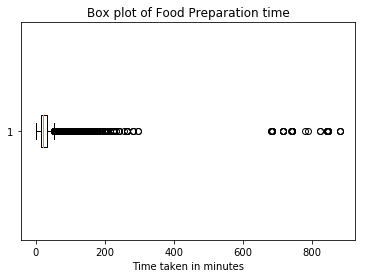

In [22]:
plt.boxplot(KPT,vert=False)
plt.xlabel("Time taken in minutes")
plt.title("Box plot of Food Preparation time")

plt.show()

### As we can see that from Above Box plot there is outlier where food prepartion time is beyond 100minute need to be cancelled as end user can't wait for 100 minute for his food to be served

In [16]:
df['KPT'].describe()

count    483902.000000
mean         25.266283
std          15.595960
min           0.000000
25%          16.000000
50%          22.000000
75%          31.000000
max         881.000000
Name: KPT, dtype: float64

In [17]:
df.columns

Index(['id', 'pickup_user_id', 'total_amount', 'pickup_user_address_id',
       'created_at.x', 'ki', 'cost_for_two', 'created_at.y',
       'driver_assigned_at', 'reached_shop_at', 'shipped_at',
       'reached_customer_at', 'complete_at', 'linked_at', 'item_name', 'KPT',
       'dayofweek'],
      dtype='object')

In [25]:
df[['total_amount']][df['KPT']>100].describe()

,total_amount
count,1131.000000
mean,1283.668683
std,3841.043451
min,100.800000
25%,317.820000
50%,480.000000
75%,811.160000
max,29070.480000


#### As we can see from data that 1131 count are our outliers

In [26]:
# no of rows which are taking less than 100 minute to prepare order
len(df[df['KPT']<100]) # Now we are left with this much rows 

482733

In [58]:
df = df[df['KPT']<100]
df

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.x,ki,cost_for_two,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at,item_name,KPT,dayofweek,int_of_week,Time Zone
0,22437988,10345796,961.70,15530971,NaN,NaN,NaN,01/08/17 11:20,01/08/17 11:26,01/08/17 11:30,01/08/17 11:31,01/08/17 12:11,01/08/17 12:12,01/08/17 11:26,NaN,5.0,Tuesday,2,11
1,22437990,10670850,330.00,15982357,NaN,NaN,NaN,01/08/17 11:21,01/08/17 11:22,01/08/17 11:44,01/08/17 11:45,01/08/17 11:55,01/08/17 11:56,01/08/17 11:22,NaN,23.0,Tuesday,2,11
2,22438023,10348502,299.60,15534234,NaN,NaN,NaN,01/08/17 11:30,01/08/17 11:30,01/08/17 11:48,01/08/17 11:50,01/08/17 12:00,01/08/17 12:00,01/08/17 11:30,NaN,20.0,Tuesday,2,11
3,22438033,10889894,1965.20,16276686,NaN,NaN,NaN,01/08/17 11:33,01/08/17 11:57,01/08/17 11:59,01/08/17 12:49,01/08/17 13:27,01/08/17 13:27,01/08/17 11:57,NaN,52.0,Tuesday,2,11
4,22438037,10006319,314.00,15054245,NaN,NaN,NaN,01/08/17 11:35,01/08/17 11:35,01/08/17 11:48,01/08/17 11:57,01/08/17 12:18,01/08/17 12:18,01/08/17 11:35,NaN,22.0,Tuesday,2,11
5,22438097,10970635,360.00,16391279,NaN,NaN,NaN,01/08/17 11:46,01/08/17 11:50,01/08/17 12:12,01/08/17 12:26,01/08/17 12:45,01/08/17 12:45,01/08/17 11:47,NaN,39.0,Tuesday,2,11
6,22438112,9678620,326.57,14612198,NaN,NaN,NaN,01/08/17 11:47,01/08/17 11:53,01/08/17 12:09,01/08/17 12:11,01/08/17 12:24,01/08/17 12:24,01/08/17 11:47,NaN,24.0,Tuesday,2,11
7,22438120,11063639,260.00,16514921,NaN,NaN,NaN,01/08/17 11:48,01/08/17 12:08,01/08/17 12:18,01/08/17 12:19,01/08/17 13:04,01/08/17 13:04,01/08/17 11:49,NaN,30.0,Tuesday,2,11
8,22438129,10352974,637.11,15539834,NaN,NaN,NaN,01/08/17 11:51,01/08/17 11:52,01/08/17 11:55,01/08/17 11:57,01/08/17 12:17,01/08/17 12:17,01/08/17 11:52,NaN,5.0,Tuesday,2,11
9,22438139,10889894,1239.50,16276686,NaN,NaN,NaN,01/08/17 11:55,01/08/17 12:07,01/08/17 12:09,01/08/17 12:25,01/08/17 12:45,01/08/17 13:26,01/08/17 12:04,NaN,21.0,Tuesday,2,12


In [19]:
#converting Monday Tuesday and Wednesday as 1 , 2, 3
intofweek =[]
d ={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
day=list(df['dayofweek'])
for i in day:
    if i in d:
        intofweek.append(d[i])
        
    
    

In [21]:
df['int_of_week'] = intofweek

#### No of columns 

In [22]:
df.columns

Index(['id', 'pickup_user_id', 'total_amount', 'pickup_user_address_id',
       'created_at.x', 'ki', 'cost_for_two', 'created_at.y',
       'driver_assigned_at', 'reached_shop_at', 'shipped_at',
       'reached_customer_at', 'complete_at', 'linked_at', 'item_name', 'KPT',
       'dayofweek', 'int_of_week'],
      dtype='object')

#### Now we will plot scatter plot to see if which algorithm we can apply on this dataset 

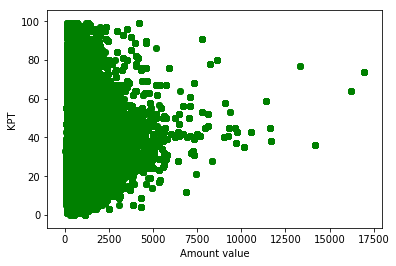

In [60]:
import matplotlib.pyplot as plt
plt.scatter(df['total_amount'], df['KPT'], color='green')
plt.xlabel('Amount value')
plt.ylabel('KPT')
plt.show()



### As you can see from above scatter plot that it KPT doesn't vary lineary with amount so we can't use linear regression 
### Let's us use Random forest Algorithm and know the accuracy of our prediction model

In [23]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [24]:
from sklearn.model_selection import train_test_split

In [24]:
df[['pickup_user_id', 'total_amount', 'int_of_week']][0:100001]

,pickup_user_id,total_amount,int_of_week
0,10345796,961.70,2
1,10670850,330.00,2
2,10348502,299.60,2
3,10889894,1965.20,2
4,10006319,314.00,2
5,10970635,360.00,2
6,9678620,326.57,2
7,11063639,260.00,2
8,10352974,637.11,2
9,10889894,1239.50,2


#### Here i have use three feature as pickup order id , total amount and int of week mean sat sund monday
#### split data set into 70 to 30 ratio

In [34]:
X=df[['pickup_user_id', 'total_amount', 'int_of_week']]  # Features
y=df['KPT']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [37]:
#load our model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=42)

In [38]:
#thit is how we get the feature importance with simple steps:
model.fit(X_train,y_train)
# display the relative importance of each attribute
importances = model.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.5705229539899211, 'total_amount'), (0.4166714094790386, 'pickup_user_id'), (0.012805636531040358, 'int_of_week')]


In [39]:
import numpy as np

# Use the forest's predict method on the test data
predictions = model.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

errors

266974    32.0
428856     0.0
428277     0.0
371854     0.0
470168    11.0
34798      0.0
369644     0.0
309870    36.0
349582     0.0
451687     0.0
136078     0.0
117579     0.0
187792     0.0
175952     0.0
30118     22.0
24266      1.0
3459      11.0
352798    41.0
184012     2.0
175510     4.0
113333     7.0
1217      13.0
378243     5.0
104527    22.0
184316     0.0
215955    25.0
79057      0.0
305168     6.0
194858     0.0
105241     0.0
          ... 
351486     0.0
359230     0.0
461824     9.0
4116       7.0
45927      0.0
367281     6.0
270825    17.0
56071      0.0
201668     0.0
100501     0.0
1297       0.0
129861     0.0
198262     6.0
392243     7.0
22513     19.0
295209     0.0
300595     0.0
206027     0.0
73884      3.0
208012     0.0
376683     0.0
407377     0.0
437108     0.0
380396     0.0
398870     0.0
260901     0.0
387167    28.0
479635     1.0
185733     1.0
20272      0.0
Name: KPT, Length: 144820, dtype: float64

In [40]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



Mean Absolute Error: 4.32 degrees.


In [41]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 75.95 %.


In [43]:
pred=list(predictions)

In [44]:
y_t=list(y_test)

In [45]:
model_df = pd.DataFrame(y_t,columns=['Y_test'])


In [46]:
model_df['Predictions']=pd.DataFrame(predictions)

In [47]:
model_df

,Y_test,Predictions
0,6.0,38.0
1,33.0,33.0
2,18.0,18.0
3,34.0,34.0
4,25.0,36.0
5,8.0,8.0
6,9.0,9.0
7,56.0,20.0
8,30.0,30.0
9,10.0,10.0


In [48]:
model_df['error']=pd.DataFrame(np.array(y_t)-np.array(pred))

In [49]:
model_df

,Y_test,Predictions,error
0,6.0,38.0,-32.0
1,33.0,33.0,0.0
2,18.0,18.0,0.0
3,34.0,34.0,0.0
4,25.0,36.0,-11.0
5,8.0,8.0,0.0
6,9.0,9.0,0.0
7,56.0,20.0,36.0
8,30.0,30.0,0.0
9,10.0,10.0,0.0


In [50]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

NameError: name 'train_features' is not defined

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
#thit is how we get the feature importance with simple steps:
rf.fit(X_train,y_train)
# display the relative importance of each attribute
importances = model.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.56785215354646, 'total_amount'), (0.4150289158978365, 'pickup_user_id'), (0.01711893055570355, 'int_of_week')]


In [25]:
linked_at = list(df['linked_at'])
time_zone =[]

# creating 24 time zone to know it affect the KPT tiem

for index,val in enumerate (linked_at):
    time_zone.append((val[9:11]))
    

In [26]:
linked_at[1000][9:11]

'9:'

In [27]:
linked_at[0]

'01/08/17 11:26'

In [28]:
df['Time zone']=time_zone


In [29]:
#len(df)
len(time_zone)

482733

In [26]:
t_z =[]
for index,val in enumerate(time_zone):
    
    if ":" in val:
        t_z.append(int(val[0]))
        #print(index,int(val[0:1]))
    else:
        t_z.append(int(val[0:2]))
        #print(index,int(val))

In [27]:
len(t_z)

482733

In [58]:
linked_at[1000]

'05/08/17 9:04'

In [28]:
df['Time Zone']=t_z

In [34]:
del df['Time zone']

In [29]:
df.columns

Index(['id', 'pickup_user_id', 'total_amount', 'pickup_user_address_id',
       'created_at.x', 'ki', 'cost_for_two', 'created_at.y',
       'driver_assigned_at', 'reached_shop_at', 'shipped_at',
       'reached_customer_at', 'complete_at', 'linked_at', 'item_name', 'KPT',
       'dayofweek', 'int_of_week', 'Time Zone'],
      dtype='object')

#### For 1lakh data point i am getting an accuracy of ~80% in KPT time using 500 estimators 


In [34]:

X=df[['pickup_user_id', 'total_amount', 'int_of_week','Time Zone']] [0:100001] # Features
y=df['KPT'][0:100001]  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#load our model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500,random_state=42)

#thit is how we get the feature importance with simple steps:
model.fit(X_train,y_train)
# display the relative importance of each attribute
importances = model.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.41755044446918016, 'total_amount'), (0.30158694509474543, 'pickup_user_id'), (0.15499798725009903, 'Time Zone'), (0.1258646231859755, 'int_of_week')]


In [35]:
import numpy as np

# Use the forest's predict method on the test data
predictions = model.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.67 degrees.
Accuracy: 79.57 %.


In [37]:
import matplotlib.pyplot as plt





#### A plot to show the Predicted value and actual value of KPT time for 1lakh data point with 30000 test case

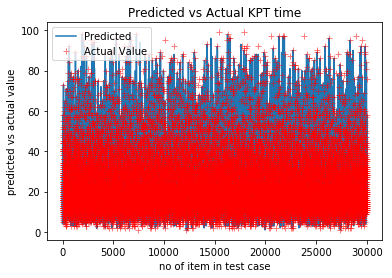

In [44]:
x = range(len(predictions))
y1 = list(predictions)
plt.plot(x, y1, label = "Predicted")
y2 = list(y_test)
# plotting the line 2 points 
plt.plot(x, y2,'r+', label = "Actual Value",alpha=0.5)
plt.xlabel('no of item in test case')
# Set the y axis label of the current axis.
plt.ylabel('predicted vs actual value')
# Set a title of the current axes.
plt.title('Predicted vs Actual KPT time')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### Now checking with all available data point(~4.8lakh) using 120 decision tree,

# I am getting an accuracy of ~82% 



In [47]:
X=df[['pickup_user_id', 'total_amount', 'int_of_week','Time Zone']] # Features
y=df['KPT']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#load our model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=120,random_state=42)

#thit is how we get the feature importance with simple steps:
model.fit(X_train,y_train)
# display the relative importance of each attribute
importances = model.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.41341385373676537, 'total_amount'), (0.3389624860660007, 'pickup_user_id'), (0.1320129528954144, 'Time Zone'), (0.11561070730181955, 'int_of_week')]


In [48]:
import numpy as np

# Use the forest's predict method on the test data
predictions = model.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.21 degrees.
Accuracy: 81.73 %.


In [49]:
model_rf = pd.DataFrame(list(y_test),columns=['Y_test'])


In [50]:
model_rf['Predicted'] = list(predictions)

In [52]:
model_rf['errors'] = pd.DataFrame(abs(np.array(y_test)-np.array(predictions)))

## Predicted vs ACTUAL AND ERROR VALUE OF DATAFRAME CONSIST OF 4.8 LAKH POINT for most of the value error is zero

In [56]:
model_rf ### no of test case is 144821 which is 30% of 4.8 lakh point

,Y_test,Predicted,errors
0,14.0,14.0,0.0
1,17.0,17.0,0.0
2,12.0,12.0,0.0
3,6.0,6.0,0.0
4,33.0,33.0,0.0
5,37.0,37.0,0.0
6,27.0,27.0,0.0
7,19.0,19.0,0.0
8,43.0,43.0,0.0
9,29.0,29.0,0.0


,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.x,ki,cost_for_two,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at,item_name,KPT,dayofweek,int_of_week,Time Zone
0,22437988,10345796,961.70,15530971,NaN,NaN,NaN,01/08/17 11:20,01/08/17 11:26,01/08/17 11:30,01/08/17 11:31,01/08/17 12:11,01/08/17 12:12,01/08/17 11:26,NaN,5.0,Tuesday,2,11
1,22437990,10670850,330.00,15982357,NaN,NaN,NaN,01/08/17 11:21,01/08/17 11:22,01/08/17 11:44,01/08/17 11:45,01/08/17 11:55,01/08/17 11:56,01/08/17 11:22,NaN,23.0,Tuesday,2,11
2,22438023,10348502,299.60,15534234,NaN,NaN,NaN,01/08/17 11:30,01/08/17 11:30,01/08/17 11:48,01/08/17 11:50,01/08/17 12:00,01/08/17 12:00,01/08/17 11:30,NaN,20.0,Tuesday,2,11
3,22438033,10889894,1965.20,16276686,NaN,NaN,NaN,01/08/17 11:33,01/08/17 11:57,01/08/17 11:59,01/08/17 12:49,01/08/17 13:27,01/08/17 13:27,01/08/17 11:57,NaN,52.0,Tuesday,2,11
4,22438037,10006319,314.00,15054245,NaN,NaN,NaN,01/08/17 11:35,01/08/17 11:35,01/08/17 11:48,01/08/17 11:57,01/08/17 12:18,01/08/17 12:18,01/08/17 11:35,NaN,22.0,Tuesday,2,11
5,22438097,10970635,360.00,16391279,NaN,NaN,NaN,01/08/17 11:46,01/08/17 11:50,01/08/17 12:12,01/08/17 12:26,01/08/17 12:45,01/08/17 12:45,01/08/17 11:47,NaN,39.0,Tuesday,2,11
6,22438112,9678620,326.57,14612198,NaN,NaN,NaN,01/08/17 11:47,01/08/17 11:53,01/08/17 12:09,01/08/17 12:11,01/08/17 12:24,01/08/17 12:24,01/08/17 11:47,NaN,24.0,Tuesday,2,11
7,22438120,11063639,260.00,16514921,NaN,NaN,NaN,01/08/17 11:48,01/08/17 12:08,01/08/17 12:18,01/08/17 12:19,01/08/17 13:04,01/08/17 13:04,01/08/17 11:49,NaN,30.0,Tuesday,2,11
8,22438129,10352974,637.11,15539834,NaN,NaN,NaN,01/08/17 11:51,01/08/17 11:52,01/08/17 11:55,01/08/17 11:57,01/08/17 12:17,01/08/17 12:17,01/08/17 11:52,NaN,5.0,Tuesday,2,11
9,22438139,10889894,1239.50,16276686,NaN,NaN,NaN,01/08/17 11:55,01/08/17 12:07,01/08/17 12:09,01/08/17 12:25,01/08/17 12:45,01/08/17 13:26,01/08/17 12:04,NaN,21.0,Tuesday,2,12
